In [29]:
import os
import sys
import subprocess
import json

In [30]:
events = ['normal_0.3_0.8', 'normal_0.3_1.0', 'normal_0.3_2.0', 'normal_0.5_1.5']
epoches = [80, 160, 240, 320, 400, 480, 560]

In [34]:
all_aps = {}
for event in events:
    for epoch in epoches:
        res = subprocess.run(f"python tools/test_widerface.py work_dirs/{event}/{event}.py work_dirs/{event}/epoch_{epoch}.pth --mode 2", shell=True, capture_output=True, cwd='/home/ww/projects/wwfacedet')
        if res.returncode == 0:
            out_text = res.stdout.decode("utf-8")
            aps = [float(x) for x in out_text[out_text.index("APS: [") + 6 : -2].split(', ')]
            if event in all_aps:
                all_aps[event].append(aps)
            else:
                all_aps[event] = [aps]
        else:
            with open('t.json', 'w') as f:
                json.dump(all_aps, f)
            print(out_text)
with open('t.json', 'w') as f:
    json.dump(all_aps, f)

[{'type': 'LoadImageFromFile'}, {'type': 'MultiScaleFlipAug', 'img_scale': None, 'flip': False, 'transforms': [{'type': 'Resize', 'keep_ratio': True}, {'type': 'RandomFlip', 'flip_ratio': 0.0}, {'type': 'Normalize', 'mean': [0.0, 0.0, 0.0], 'std': [1.0, 1.0, 1.0], 'to_rgb': False}, {'type': 'Pad', 'size': None, 'pad_val': 0, 'size_divisor': 32}, {'type': 'ImageToTensor', 'keys': ['img']}, {'type': 'Collect', 'keys': ['img']}], 'scale_factor': 1.0}]
origin image size 3226
load checkpoint from local path: work_dirs/normal_0.3_0.8/epoch_560.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 3226/3226, 53.3 task/s, elapsed: 61s, ETA:     0s
Recall-Precision-Thresh: 0.09582582166135072 1.0 0.9390000000000001
Recall-Precision-Thresh: 0.1947025377894883 0.999288256227758 0.927
Recall-Precision-Thresh: 0.29635279434197753 0.999532273152479 0.917
Recall-Precision-Thresh: 0.39855775897933715 0.9989572471324296 0.906
Recall-Precision-Thresh: 0.49410622659825265 0.9988786094757499 0.892
Recall-Precision-Thresh: 0.

In [35]:
[float(x) for x in out_text[out_text.index("APS: [") + 6 : -2].split(', ')]

[0.8923199132596514, 0.8832359872825174, 0.8106903124030842]

In [36]:
all_aps


{'normal_0.3_0.8': [[0.8194296145503434,
   0.7841501844685038,
   0.660108139259454],
  [0.8715055116316808, 0.8225765622955263, 0.647937313477825],
  [0.8583974782898707, 0.8315857242768382, 0.712521346155881],
  [0.8612974301715972, 0.8431607765817739, 0.7222295136448174],
  [0.8381490580579387, 0.8367499778518088, 0.6542793561430366],
  [0.8912803029973901, 0.8764052196951891, 0.7585410740719594],
  [0.9024301287702149, 0.8816069989355046, 0.7732492629682342]],
 'normal_0.3_2.0': [[0.825469106626751,
   0.8128794936579523,
   0.7072894686799586],
  [0.8354248915126286, 0.8255043623090867, 0.7503190148464033],
  [0.7969394435428311, 0.8022768082641486, 0.751614220839429],
  [0.8485915518145233, 0.821019885255222, 0.7474646828686038],
  [0.7924158426801713, 0.7978300535691473, 0.747668197160885],
  [0.874424201921466, 0.8637731622799332, 0.8054590195716296],
  [0.8843857491158983, 0.8752261507093405, 0.8029553297503835]],
 'normal_0.5_1.5': [[0.8341269695623705,
   0.8259840369446103

In [51]:
with open('/home/ww/projects/wwfacedet/work_dirs/eval_all.json', 'w') as f:
    json.dump(all_aps, f)

In [3]:
import numpy as np
import json
with open('/home/ww/projects/wwfacedet/work_dirs/eval_all.json', 'r') as f:
    all_aps = json.load(f)

def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data
bd_train_ori = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_train_ori.json')
bd_crop_03_08 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_03_08.json')
bd_crop_05_15 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_05_15.json')
bd_crop_03_20 = read_json('/home/ww/projects/wwfacedet/work_dirs/browse_dataset/bd_03_20.json')

all_data = [bd_crop_03_08, bd_crop_05_15, bd_crop_03_20, bd_train_ori]

def size_stat(data, level):
    count = [0] * (len(level) + 1)
    for k, v in data.items():
        for idx, le in enumerate(level):
            if int(k) < le:
                count[idx] += v
                break
        else:
            count[-1] += v
    total = np.sum(count)
    count_p = [c / total * 100 for c in count]
    return count, count_p


def data_generate(scale, num):
    level = [scale * x for x in range(num)]
    axis_x = np.arange(len(level) + 1) * scale
    all_data_d = [size_stat(bd, level) for bd in all_data]
    return axis_x, all_data_d, scale

axis_x, all_data_d, scale = data_generate(1, 40)

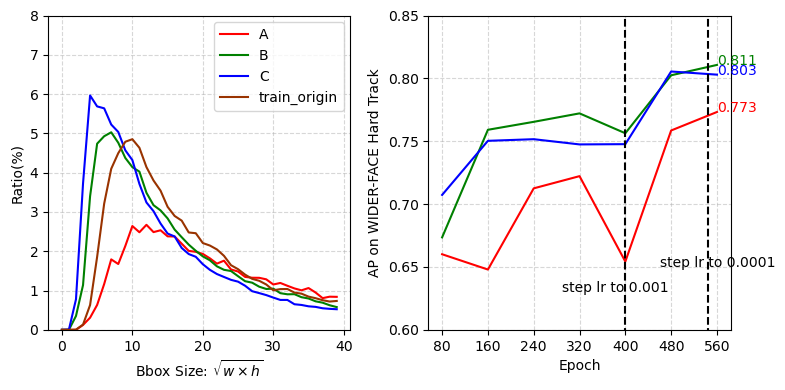

In [6]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
labels = ['A', 'B', 'C', 'train_origin']
events = ['normal_0.3_0.8', 'normal_0.5_1.5', 'normal_0.3_2.0']
epoches = [80, 160, 240, 320, 400, 480, 560]
all_data_color = ['red', 'green', 'blue']

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
fig = plt.figure(figsize=(8, 4)) 

ax1 = plt.subplot(gs[1])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('AP on WIDER-FACE Hard Track')
ax1.set_ylim(0.6, 0.85)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xticks(epoches)

ax2 = plt.subplot(gs[0])
ax2.set_ylabel('Ratio(%)')
ax2.set_ylim(0, 8)
ax2.set_xlabel('Bbox Size: $\\sqrt{w \\times h}$')
# ax2.set_xlabel('Bbox Size: $\\frac{\\sqrt{w \\times h}}{' + str(scale) +'}$')

for idx, e in enumerate(events):
    y = [it[2] for it in all_aps[e]]
    ax1.plot(epoches, y, label=labels[idx], color=all_data_color[idx])
    ax2.plot(axis_x[:-1], all_data_d[idx][1][:-1], label=labels[idx], color=all_data_color[idx])
    ax1.text(epoches[-1], y[-1], str(format(y[-1], '.3f')), color=all_data_color[idx])


ax2.plot(axis_x[:-1], all_data_d[3][1][:-1], label=labels[idx], color='#993300')
ax1.vlines([400, 544], ymin=0, ymax=0.85, color=["black"], linestyles='--')
ax1.text(290, 0.63, 'step lr to 0.001', color='black')
ax1.text(460, 0.65, 'step lr to 0.0001', color='black')


ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(labels)

fig.tight_layout()
plt.savefig('./eval.pdf', dpi=300, bbox_inches='tight')
